In [66]:
import pandas as pd
import nltk
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Hong Leong Bank sentiment

In [84]:
news2 = pd.read_csv('HLB_news.csv',encoding = 'unicode_escape')
news2.head()

,code,date,news,company_code
0,https://www.klsescreener.com/v2/news/stock/5819,"TheEdge18 Dec, 2019 13:27pm - 8 hours ago",?????????????????? ??????????????????,5819
1,https://www.klsescreener.com/v2/news/stock/5819,"TheEdge18 Dec, 2019 12:54pm - 8 hours ago",KLCI recovers on mild year-end window dressing,5819
2,https://www.klsescreener.com/v2/news/stock/5819,"Sinchew18 Dec, 2019 12:46pm - 8 hours ago",?????????????????????????????????????2??????,5819
3,https://www.klsescreener.com/v2/news/stock/5819,"TheEdge17 Dec, 2019 13:22pm - 1 day ago",????????????????? ????????????,5819
4,https://www.klsescreener.com/v2/news/stock/5819,"TheEdge17 Dec, 2019 12:53pm - 1 day ago",KLCI drifts lower as technical indicators poin...,5819


In [77]:
sia = SIA()
results = []

for line in news2.news:
    pol_score = sia.polarity_scores(line)
    pol_score['news'] = line
    results.append(pol_score)


In [78]:
df2 = pd.DataFrame.from_records(results)
df2.head()

,compound,neg,neu,news,pos
0,0.000,0.000,1.000,?????????????????? ??????????????????,0.0
1,0.000,0.000,1.000,KLCI recovers on mild year-end window dressing,0.0
2,0.000,0.000,1.000,?????????????????????????????????????2??????,0.0
3,0.000,0.000,1.000,????????????????? ????????????,0.0
4,-0.296,0.239,0.761,KLCI drifts lower as technical indicators poin...,0.0


In [79]:
df2['label'] = 0
df2.loc[df['compound'] > 0.05, 'label'] = 1
df2.loc[df['compound'] < -0.05, 'label'] = -1
df2.head()

,compound,neg,neu,news,pos,label
0,0.000,0.000,1.000,?????????????????? ??????????????????,0.0,1
1,0.000,0.000,1.000,KLCI recovers on mild year-end window dressing,0.0,1
2,0.000,0.000,1.000,?????????????????????????????????????2??????,0.0,1
3,0.000,0.000,1.000,????????????????? ????????????,0.0,0
4,-0.296,0.239,0.761,KLCI drifts lower as technical indicators poin...,0.0,-1


In [80]:
df3 = df2[[ 'news', 'label']]
df3.head()

,news,label
0,?????????????????? ??????????????????,1
1,KLCI recovers on mild year-end window dressing,1
2,?????????????????????????????????????2??????,1
3,????????????????? ????????????,0
4,KLCI drifts lower as technical indicators poin...,-1


In [81]:
df3.to_csv('hlb_news_labels.csv', mode='a', encoding='utf-8', index=False)

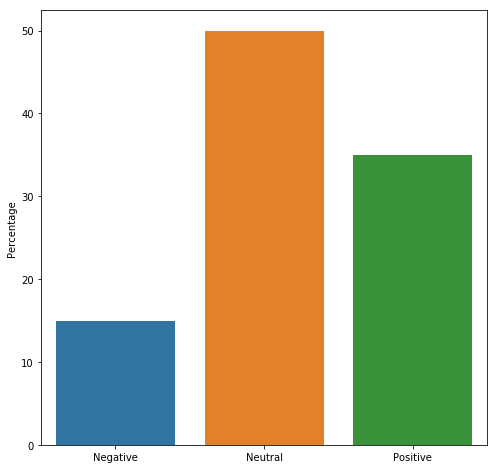

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()